In [1]:
import pandas as pd
from sqlalchemy import create_engine, text
import cred_pg as c

# None = unbegrenzt
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)

In [3]:
engine = create_engine(
    f'postgresql+psycopg://{c.pg_userid}:{c.pg_password}@{c.pg_host}/{c.pg_db}', 
    connect_args = {
        'options': '-c search_path=${user},ugeobln,ugm,uinsta,umisc,umobility,usozmed,public', 
        'keepalives_idle': 120
    },
    pool_size=1, 
    max_overflow=0,
    execution_options={ 'isolation_level': 'AUTOCOMMIT' }
)

In [5]:
with engine.connect() as con:
    sql = "select rolname  from pg_roles where rolname like 'u%'"
    df = pd.read_sql_query(text(sql), con)
df

rolname
0       ucla
1    ugeobln
2        ugm
3     uinsta
4      umisc
5  umobility
6    usozmed

In [6]:
with engine.connect() as con:
    sql = """
    select schemaname, tablename 
    from pg_tables 
    where schemaname like 'u%'
    order by schemaname, tablename
    """
    df = pd.read_sql_query(text(sql), con)
df

schemaname                  tablename
0        ucla                      Grade
1        ucla                 TextModule
2        ucla                   UserData
3        ucla                         cv
4        ucla                       food
..        ...                        ...
69    usozmed  person_studyat_university
70    usozmed      person_workat_company
71    usozmed                        tag
72    usozmed                   tagclass
73    usozmed                 university

[74 rows x 2 columns]

In [7]:
with engine.connect() as con:
    sql = """
    with
      spy as (
        select extract(year from sales_month) as jahr
        from retail_sales
      )
    select jahr, count(*) as anzahl
    from spy
    where jahr >= 2010
    group by jahr
    order by jahr
    """
    df = pd.read_sql_query(text(sql), con)
df.jahr = df.jahr.astype('int32')
df.set_index('jahr', inplace = True)
df

anzahl
jahr        
2010     780
2011     780
2012     780
2013     780
2014     780
2015     780
2016     780
2017     780
2018     780
2019     780

<Axes: xlabel='jahr'>

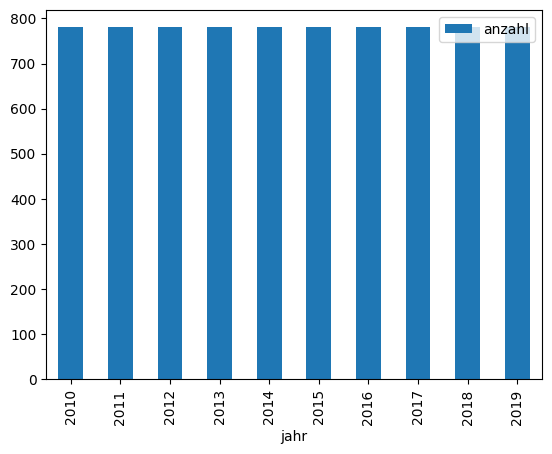

In [8]:
df.plot.bar()